## 1. 탐색: 데이터의 기초 정보

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drinks = pd.read_csv('c:/py_data/drinks.csv')

In [3]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [5]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [6]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 2. 인사이트 발견: 탐색과 시각화

### [ 두 피처간의 상관계수 구하기]   
- 여러 개의 피처들의 서로간의 상관계수를 구하기 앞서, 두 피처간의 상관계수를 구하는 연습을 해봅니다.

------------------------
#### 단순 상관 분석: 특성이 2개일 경우

In [8]:
# 'beer_servings', 'wine_servings' 두 피처간의 상관계수를 계산합니다.
# pearson은 상관계수를 구하는 계산 방법 중 하나를 의미하며,
# 가장 널리 쓰이는 방법입니다.
# 피어슨 상관 계수(Pearson Correlation Coefficient .PCC)란
# 두 변수 X와 Y 간의 선형 상관 관계를 계량화한 수치
corr = drinks[['beer_servings','wine_servings']].corr(method = 'pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


#### 다중 상관 분석: 특성이 2개 이상일 경우

In [11]:
# 피쳐간의 상관계수 행렬을 구합니다.
corr = drinks[['beer_servings','wine_servings',
               'spirit_servings','total_litres_of_pure_alcohol']].corr(method = 'pearson')
corr

,beer_servings,wine_servings,spirit_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.527172,0.458819,0.835839
wine_servings,0.527172,1.000000,0.194797,0.667598
spirit_servings,0.458819,0.194797,1.000000,0.654968
total_litres_of_pure_alcohol,0.835839,0.667598,0.654968,1.000000


#### 다중 상관 분석 시각화(히트맵)

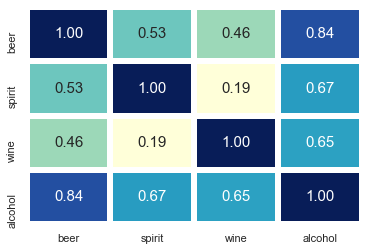

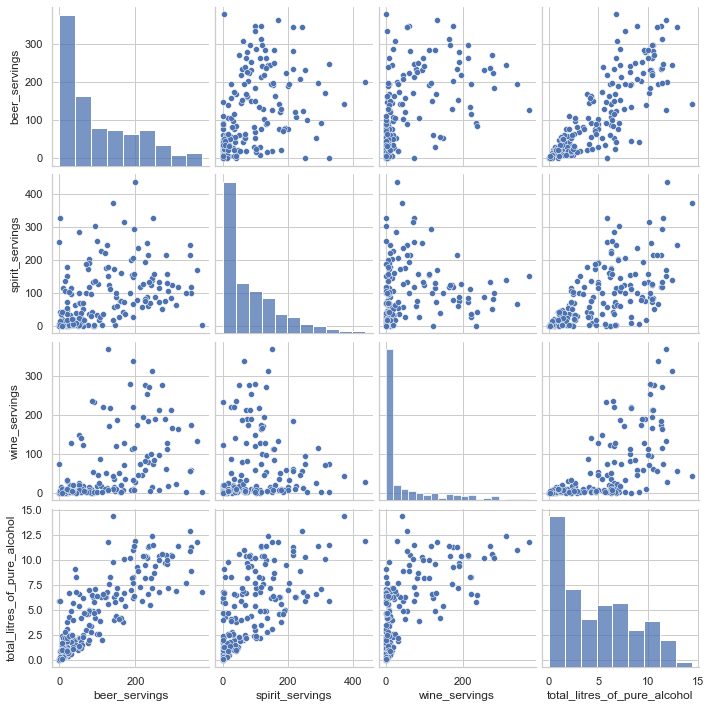

In [20]:
# 히트맵 그리기
cols_view = ['beer','spirit','wine','alcohol']  # 그래프 출력을 위한 cols 

sns.heatmap(corr,                       # 데이터프레임
            annot=True, 
            fmt='.2f',        # '.0f' = 'f' 데이터 값 표시 여부, float형
            cmap='YlGnBu',               # 컬러맵
            linewidths=5,                #구분선
            cbar=False,                 # 컬러바 표시 여부
            annot_kws={'size':15},
            yticklabels=cols_view,
            xticklabels=cols_view)                 

# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style = 'whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height = 2.5)
plt.show()

In [17]:
# 인사이트(..!!!)
# total_litres_of_pure_alcohol 피처가 대체적으로 모든 피처와 
# 상관 관계가 있는 것으로 보이며,
# 특히 beer_servings와 상관성이 높다. 

## 3. 탐색적 분석
#### 3-1. 결측치 처리

In [21]:
drinks.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [22]:
# 결측데이터를 처리합니다 : 기타 대륙으로 통홥 -> 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')
print(drinks.head(10))
print('\n')
print(drinks.isnull().sum())

             country  beer_servings  spirit_servings  wine_servings  \
0        Afghanistan              0                0              0   
1            Albania             89              132             54   
2            Algeria             25                0             14   
3            Andorra            245              138            312   
4             Angola            217               57             45   
5  Antigua & Barbuda            102              128             45   
6          Argentina            193               25            221   
7            Armenia             21              179             11   
8          Australia            261               72            212   
9            Austria            279               75            191   

   total_litres_of_pure_alcohol continent  
0                           0.0        AS  
1                           4.9        EU  
2                           0.7        AF  
3                          12.4        EU 

#### 3-2. 파이차트

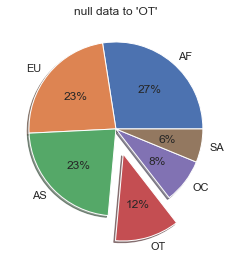

In [30]:
# 대륙 기준으로 파이차트 그리기
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.3, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

#### 3-3. 그룹단위 데이터 분석

In [31]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산합니다.

In [33]:
drinks.groupby('continent').get_group('OT')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,OT
11,Bahamas,122,176,51,6.3,OT
14,Barbados,143,173,36,6.3,OT
17,Belize,263,114,8,6.8,OT
32,Canada,240,122,100,8.2,OT
41,Costa Rica,149,87,11,4.4,OT
43,Cuba,93,137,5,4.2,OT
50,Dominica,52,286,26,6.6,OT
51,Dominican Republic,193,147,9,6.2,OT
54,El Salvador,52,69,2,2.2,OT


In [53]:
# spirit_servings의 평균, 최소, 최대, 합계를 계산합니다.
result = drinks.groupby('continent').spirit_servings.agg(['mean',
                                                          'min',
                                                          'max',
                                                          'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [35]:
result['mean'].mean()

91.44378628712612

In [41]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다.
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
print(continent_mean)
print('\n')
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [46]:
# 평균 beer_serving이 가장 높은 대륙을 구합니다.
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


---------------------------------------   
### 분석 결과 시각화   
(대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화)

In [60]:
# array랑 list의 차이
print(np.arange(6) * 2)

list(range(6)) *2 

[ 0  2  4  6  8 10]


[0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]

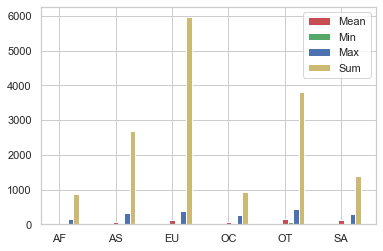

In [57]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화한다.
n_groups = len(result.index)       
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

(대륙별 'total_litres_of_pure_alcohol' 평균 시각화)

In [62]:
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [66]:
continents = list(continent_mean.index)
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA']

In [67]:
continents.append('mean')
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'mean']

In [68]:
alcohol = list(continent_mean)
alcohol

[3.00754716981132,
 2.1704545454545454,
 8.617777777777777,
 3.3812500000000005,
 5.995652173913044,
 6.308333333333334]

In [70]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
total_mean

4.717098445595855

In [71]:
alcohol.append(total_mean)
alcohol

[3.00754716981132,
 2.1704545454545454,
 8.617777777777777,
 3.3812500000000005,
 5.995652173913044,
 6.308333333333334,
 4.717098445595855]

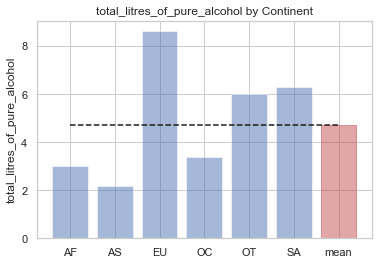

In [73]:
x_pos = np.arange(len(continents))
bar_list = plt.bar(x_pos, alcohol, align='center',alpha=0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0,6], [total_mean, total_mean], 'k--')
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

(대륙별 beer_servings를 시각화 한다.)

In [76]:
beer_group = drinks.groupby('continent').beer_servings.sum()
beer_group

continent
AF    3258
AS    1630
EU    8720
OC    1435
OT    3345
SA    2101
Name: beer_servings, dtype: int64

In [77]:
beer_continents = beer_group.index.tolist()
beer_continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA']

In [80]:
beer_king = beer_group[0:].tolist()
beer_king

[3258, 1630, 8720, 1435, 3345, 2101]

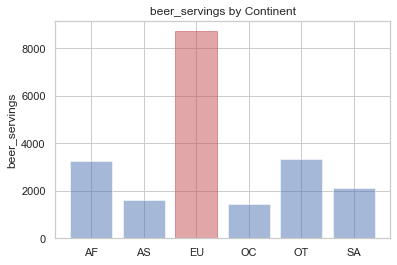

In [82]:
x_pos1 = np.arange(len(beer_continents))
beer_bar = plt.bar(x_pos1, beer_king, align='center', alpha=0.5)
beer_bar[2].set_color('r')
plt.xticks(x_pos1, beer_continents)

plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
plt.show()

## 4. 통계분석

In [83]:
from scipy import stats

In [84]:
# 아프리카와 유럽간의 맥주 소비량 차이를 검정합니다.
africa = drinks.loc[drinks['continent']=='AF']
africa

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF
27,Burundi,88,0,0,6.3,AF
28,Cote d'Ivoire,37,1,7,4.0,AF
29,Cabo Verde,144,56,16,4.0,AF
31,Cameroon,147,1,4,5.8,AF
33,Central African Republic,17,2,1,1.8,AF


In [86]:
europe = drinks.loc[drinks['continent']=='EU']
europe

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [88]:
tTestResult = stats.ttest_ind(africa['beer_servings'],
                              europe['beer_servings'])
tTestResult

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)

In [89]:
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'],
                                     europe['beer_servings'],
                                     equal_var=False)
tTestResultDiffVar

# p-value 낮을 수록 좋음 (유의미하다)

Ttest_indResult(statistic=-7.143520192189803, pvalue=2.9837787864303205e-10)

In [100]:
# total_servings 피치 생성 
drinks['total_servings'] = drinks['beer_servings']+drinks['spirit_servings']+drinks['wine_servings']
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [101]:
# 술 소비량 대비 알콜 비율 피치 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,NaN
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [103]:
drinks.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                        0
total_servings                   0
alcohol_rate                    13
dtype: int64

In [105]:
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)
drinks.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
total_servings                  0
alcohol_rate                    0
dtype: int64

In [106]:
# 순위 정보를 생성합니다.
country_with_rank = drinks[['country','alcohol_rate']]
country_with_rank= country_with_rank.sort_values(by=['alcohol_rate'],
                                                 ascending=False)
country_with_rank

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
...,...,...
103,Maldives,0.000000
97,Libya,0.000000
79,Iran,0.000000
90,Kuwait,0.000000


In [110]:
country_with_rank = country_with_rank.reset_index()

In [111]:
country_with_rank[country_with_rank['country']=='South Korea']

,index,country,alcohol_rate
14,138,South Korea,0.059394


In [112]:
del country_with_rank['index']

#### 국가별 순위 정보를 그래프로 시각화합니다.

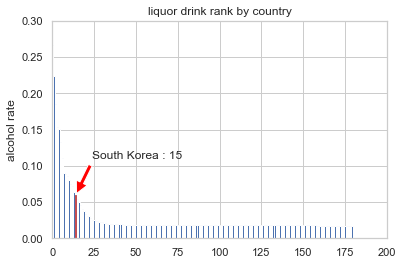

In [113]:
# 국가별 순위 정보를 그래프로 시각화 한다.
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
http://localhost:8888/notebooks/python_code/20210603%201.%20%ED%83%90%EC%83%89%EC%A0%81%20%EC%9E%90%EB%A3%8C%20%EB%B6%84%EC%84%9D(EDA).ipynb#
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank +1),
            xy=(korea_rank, korea_alc_rate),
            xytext=(korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops=dict(facecolor='red', shrink = 0.05))
plt.show()